In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#advance data visualization lib that will help us to build
import plotly.express as px
#settings the figure size and bg for our visualization
plt.rcParams['figure.figsize']=(16,5)
plt.style.use('fivethirtyeight')

In [50]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [51]:
data=pd.read_csv('medical-condition.csv')
data

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [52]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [53]:
#independent columns are those columns using which we will predict the target column
#bmi - as the people having very less bmi or very high bmi have more chances of needing me

# Univariate analysis


C:\Users\amirtha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



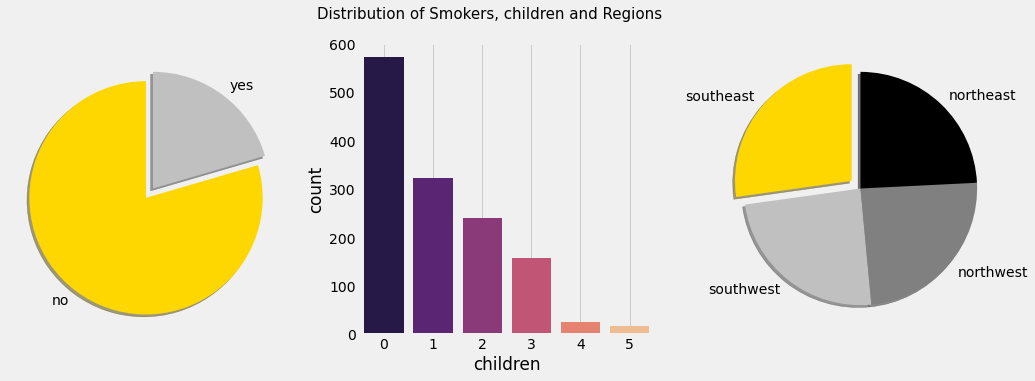

In [54]:
# Lets check the distribution of smoker, children and region

plt.subplot(1, 3, 1)
plt.pie(data['smoker'].value_counts().values,
    labels = data['smoker'].value_counts().index,
    colors = ['gold','silver'],
    startangle = 90,
    shadow = True,
    explode = [0.1, 0])

plt.subplot(1, 3, 2)
sns.countplot(data['children'], palette = 'magma')
plt.grid()

plt.subplot(1, 3, 3)
plt.pie(data['region'].value_counts().values,
    labels = data['region'].value_counts().index,
    colors = ['gold', 'silver', 'grey', 'black'],
    startangle = 90,
    shadow = True,
    explode = [0.1, 0, 0, 0])
plt.suptitle( 'Distribution of Smokers, children and Regions', fontsize = 15)
plt.show()

C:\Users\amirtha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\amirtha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\amirtha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



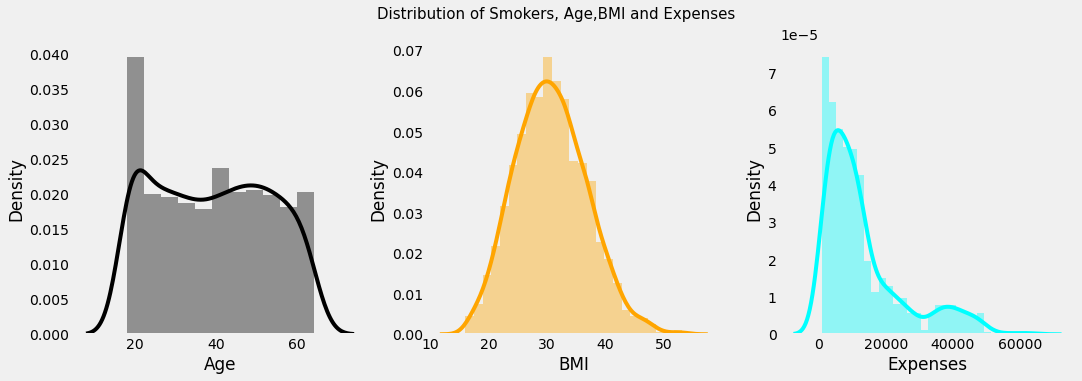

In [55]:
#lets check the distribution of age,bmi and expenses

plt.subplot(1,3,1)
sns.distplot(data['age'],color='black')
plt.xlabel('Age')
plt.grid()

plt.subplot(1,3,2)
sns.distplot(data['bmi'],color='orange')
plt.xlabel('BMI')
plt.grid()

plt.subplot(1,3,3)
sns.distplot(data['expenses'],color='aqua')
plt.xlabel('Expenses')
plt.grid()

plt.suptitle( 'Distribution of Smokers, Age,BMI and Expenses', fontsize = 15)
plt.show()

# Bivariate analysis

In [56]:
#lets understand the impact of age on medical expenses
px.scatter(data,y='expenses',x='age',marginal_y='violin',trendline='ols')

C:\Users\amirtha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\amirtha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



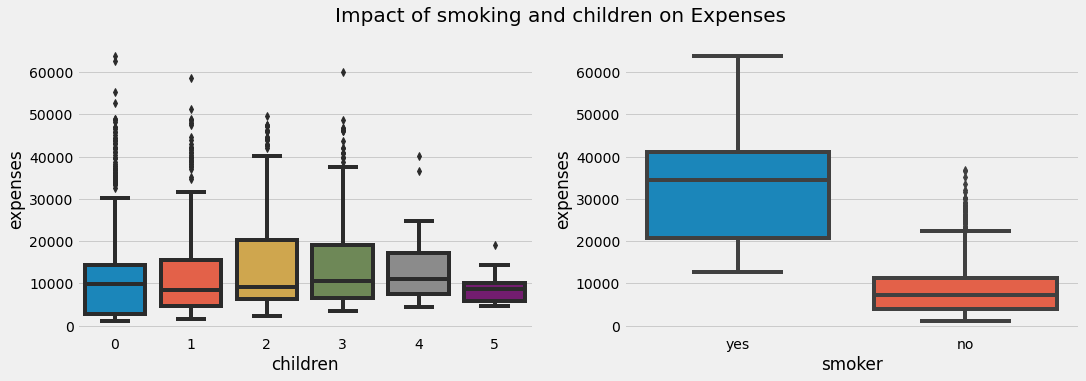

In [57]:
#lets check the impact of smoking and childern in medical expenses

plt.subplot(1,2,1)
sns.boxplot(data['children'],data['expenses'])

plt.subplot(1,2,2)
sns.boxplot(data['smoker'],data['expenses'])

plt.suptitle('Impact of smoking and children on Expenses', fontsize=20)
plt.show()

In [58]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [59]:
#mulivariate analysis

In [60]:
px.scatter(data,x="expenses",y="age",facet_row="children",facet_col="region",color="smoker",trendline="ols")

In [61]:
#the expenses of smokers in all regions range from 20k to 60k
#whereas the expenses of non smokers in all regions ranges from 10k to 20k
#the lesser range of expenses is for lesser age people and vice versa

In [62]:
px.scatter(data,x="expenses",y="bmi",facet_row="region",color="smoker",trendline="ols")

In [63]:
#we can clearly see that there is a increasing pattern for bmi as well
#for smoker with less bmi : expense is around 20k
#for smokers with high bmi : expenses is aorund 50k
#for non smokers bmi is not a huge factor,the expense range is from 5k to 10k

In [64]:
px.bar_polar(data,r="expenses",theta="region",color='sex',template='plotly_dark',color_discrete_sequence=px.colors.sequential.Plasma_r)

In [65]:
#lets check the impact of regions in expenses

data[['expenses','region']].groupby(['region']).agg(['min','mean','max']).style.background_gradient(cmap='Wistia')

In [66]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


# Data processing

In [67]:
#lets perform encoding
#as we know males have higher expenses than females,lets encode males as 2,and females as 1
#similarly smokers,have highers expense, so we will encode smokers as 2, and non smokers as 1
#as we know that the south east region has higher expense than other regions

data['sex']=data['sex'].replace(('male','female'),(2,1))
data['smoker']=data['smoker'].replace(('yes','no'),(2,1))
data['region']=data['region'].replace(('southeast','southwest','northeast','northwest'),(2,1,1,1))

#lets check whether any categorical column is left
data.select_dtypes('object').columns

Index([], dtype='object')

In [68]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,2,1,16884.92
1,18,2,33.8,1,1,2,1725.55
2,28,2,33.0,3,1,2,4449.46
3,33,2,22.7,0,1,1,21984.47
4,32,2,28.9,0,1,1,3866.86


In [69]:
#lets from dependent and independent sets

y= data['expenses']
x=data.drop(['expenses'],axis=1)

print(y.shape)
print(x.columns)

(1338,)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')


In [70]:

from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 6)
(268, 6)
(1070,)
(268,)


In [71]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_train =sc.fit_transform(x_train)
x_test =sc.transform(x_test)

# Predictive Modelling

In [72]:
#lets create a model,create a simple linear regression model

from sklearn.linear_model import LinearRegression

model1=LinearRegression()
model1.fit(x_train, y_train)

y_pred1=model1.predict(x_test)

In [73]:
from sklearn.metrics import r2_score,mean_squared_error

mse=mean_squared_error(y_test, y_pred1)
rmse=np.sqrt(mse)
print('RMSE Score :',rmse)

r2_score = r2_score(y_test, y_pred1)
print("R2 Score: ", r2_score)

RMSE Score : 5663.441749764153
R2 Score:  0.7984378814790316


# Random Forest

In [74]:
from sklearn.ensemble import RandomForestRegressor

model2= RandomForestRegressor()
model2.fit(x_train, y_train)

y_pred2= model2.predict(x_test)

In [75]:
from sklearn.metrics import r2_score,mean_squared_error

mse=mean_squared_error(y_test, y_pred2)
rmse=np.sqrt(mse)
print('RMSE Score :',rmse)
print('Expenses is around:',rmse)

r2_score = r2_score(y_test, y_pred2)
print("R2 Score: ", r2_score)

RMSE Score : 4463.897663184562
Expenses is around: 4463.897663184562
R2 Score:  0.8747791931977708


# Applying Gradient boosting model

In [76]:
from sklearn.ensemble import GradientBoostingRegressor

model3= GradientBoostingRegressor()
model3.fit(x_train, y_train)

y_pred3= model3.predict(x_test)

In [77]:
from sklearn.metrics import r2_score,mean_squared_error

mse=mean_squared_error(y_test, y_pred3)
rmse=np.sqrt(mse)
print('RMSE Score :',rmse)
print('Expenses is around:',rmse)

r2_score = r2_score(y_test, y_pred3)
print("R2 Score: ", r2_score)

RMSE Score : 4068.9052340314815
Expenses is around: 4068.9052340314815
R2 Score:  0.895959318431955


In [78]:
#lets create an ensemble by averaging

avg_model=(y_pred1+y_pred2+y_pred3)/3
#lets check the model accuracy
from sklearn.metrics import r2_score,mean_squared_error

mse=mean_squared_error(y_test, avg_model)
rmse=np.sqrt(mse)
print('RMSE Score :',rmse)
print('Expenses is around:',rmse)

r2_score = r2_score(y_test, avg_model)
print("R2 Score: ", r2_score)

RMSE Score : 4275.374798574248
Expenses is around: 4275.374798574248
R2 Score:  0.8851326970164535


In [79]:
#lets give 50% weight to gradient boosting, 30% weight to random forest and 20% weight to linear regression

weight_avg_model =0.2*y_pred1+0.3*y_pred2+0.5*y_pred3

#lets check the model accuracy
from sklearn.metrics import r2_score,mean_squared_error

mse=mean_squared_error(y_test,weight_avg_model)
rmse=np.sqrt(mse)
print('RMSE Score :',rmse)
print('Expenses is around:',rmse)

r2_score = r2_score(y_test, weight_avg_model)
print("R2 Score: ", r2_score)

RMSE Score : 4150.541317851688
Expenses is around: 4150.541317851688
R2 Score:  0.8917426177225896


In [80]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(model3,x,y,cv=5)
print(scores)


[0.88030281 0.79757234 0.88867364 0.84719067 0.85947005]


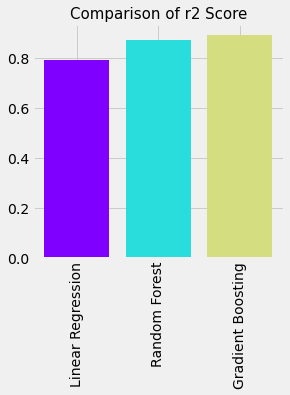

In [81]:
r2_score=np.array([0.79,0.87,0.89])
labels=np.array(['Linear Regression', 'Random Forest', 'Gradient Boosting'])
index=np.argsort(r2_score)
color=plt.cm.rainbow(np.linspace(0,1,4))

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize']=(4,4)

plt.bar(range(len(index)),r2_score[index],color=color)
plt.xticks(range(0,3),['Linear Regression', 'Random Forest', 'Gradient Boosting'],rotation=90)
plt.title('Comparison of r2 Score', fontsize=15)
plt.show()


In [82]:
#bubble chart to represent the relation of expenses with bmi,age,smoking
#only for north west region
print("\nThe person who smoke's and has higher BMI rate tend to have MORE EXPENSES")
px.scatter(data,x="expenses",y="bmi",size="age",color="smoker",hover_name="expenses",size_max=15)



The person who smoke's and has higher BMI rate tend to have MORE EXPENSES
